<a href="https://colab.research.google.com/github/abdallah155/-Bank-Marketing-Dataset-EDA-Notebook/blob/main/7_Bank_Marketing_Dataset_EDA_Notebook(Python_For_AI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data


In [4]:
import pandas as pd
import zipfile
import requests
from io import BytesIO

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

# Send a request to the URL to get the content
response = requests.get(url)

# Extract the contents of the zip file
with zipfile.ZipFile(BytesIO(response.content), 'r') as z:
    z.extractall()

# Load the dataset into a DataFrame
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

# Display the first few rows of the DataFrame
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

# Data Cleaning


In [5]:
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Quick View for the the data
We can use .describe() and .info()

<Axes: >

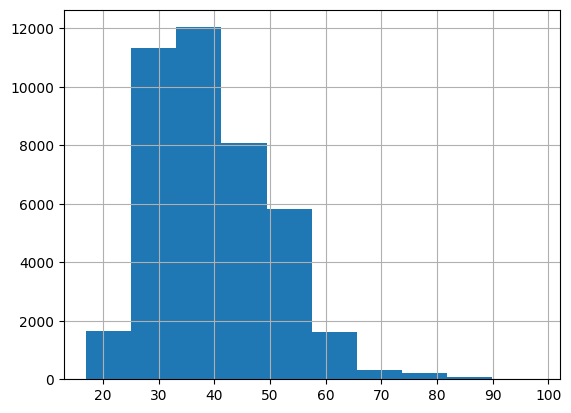

In [8]:
# 67% of the ages of employees are between 30-50
# 67% of the campaigns are bet.1-5 campaigns
df['age'].hist()

In [23]:
df['campaign'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

## Converting data types
Using .astype()

<ipython-input-10-2d3646dd07cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

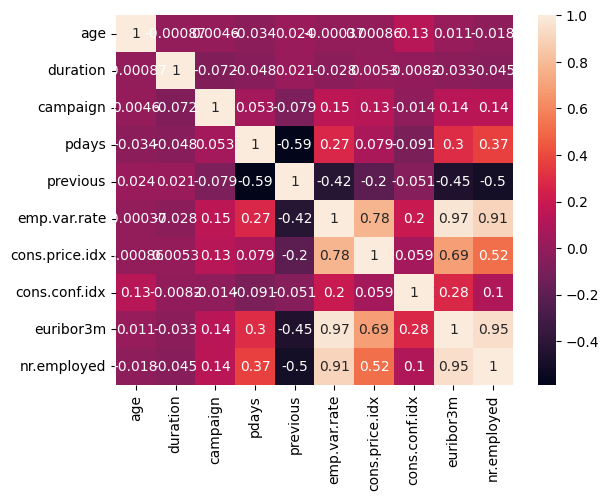

In [10]:
sns.heatmap(df.corr(),annot = True)

#### as emp.var.rate is highly correlated with cons.price.idx, euribor3m, nr.employed so remove the three vars

---



In [11]:
df.drop(['cons.price.idx','euribor3m','nr.employed'],axis=1,inplace = True)


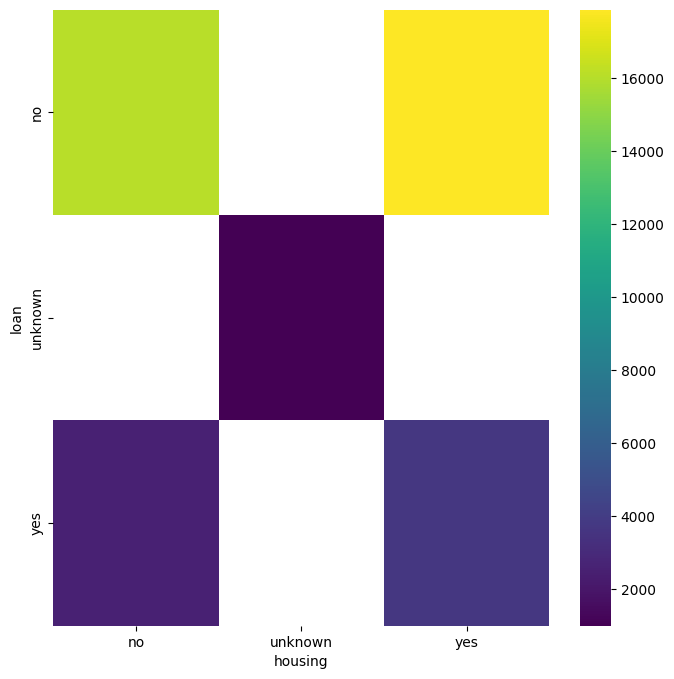

In [12]:
# @title housing vs loan
# most of the people who have houses don't get loans
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['loan'].value_counts()
    for x_label, grp in df.groupby('housing')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('housing')
_ = plt.ylabel('loan')

<ipython-input-13-5f35fdf03c97>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='age', y='education', inner='box', palette='Dark2')


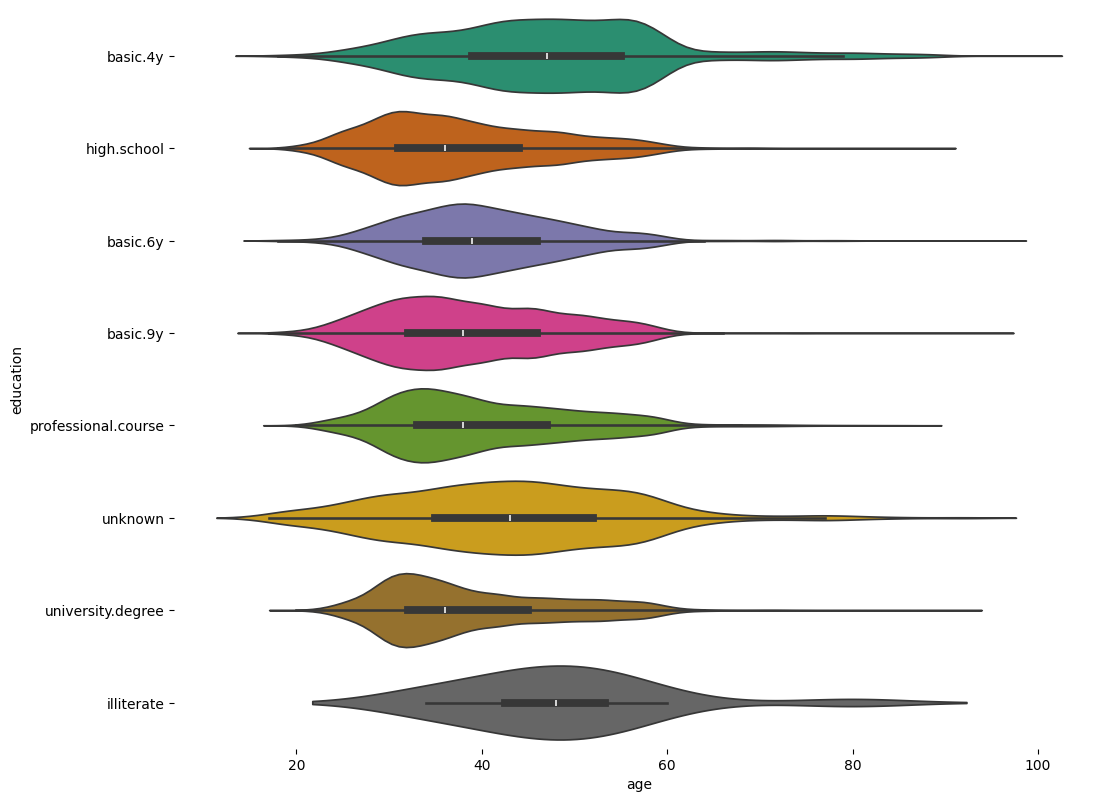

In [13]:
# @title education vs age
# most of the illiterate bet. 40-60 years old and the educated bet 20-40(uni degree)
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['education'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='education', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

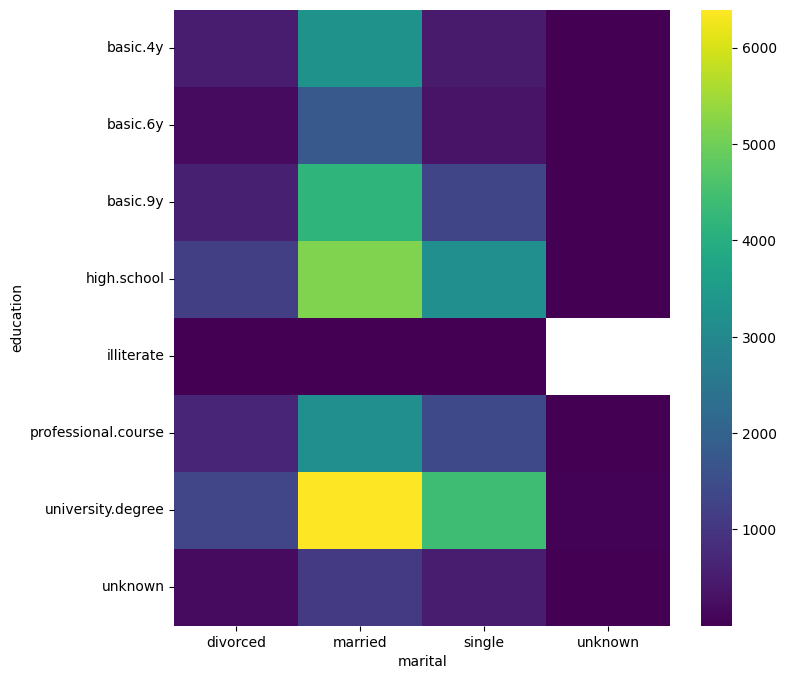

In [14]:
# @title marital vs education

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['education'].value_counts()
    for x_label, grp in df.groupby('marital')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('marital')
_ = plt.ylabel('education')
# there is a high correlation between people have university degree and married

<ipython-input-15-4cad3ff2861a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

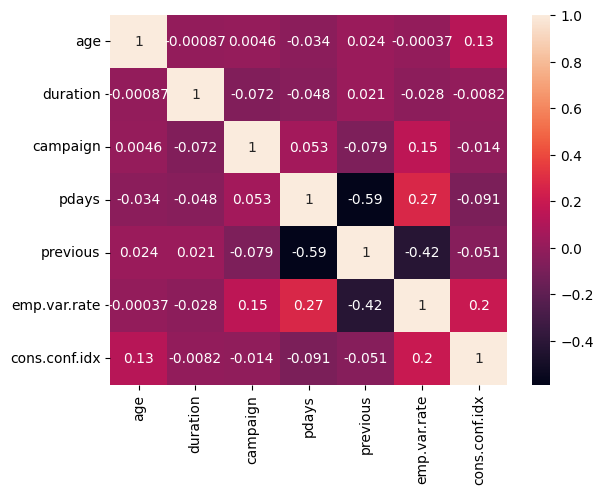

In [15]:
sns.heatmap(df.corr(),annot = True)
#multi-collinearity is removed

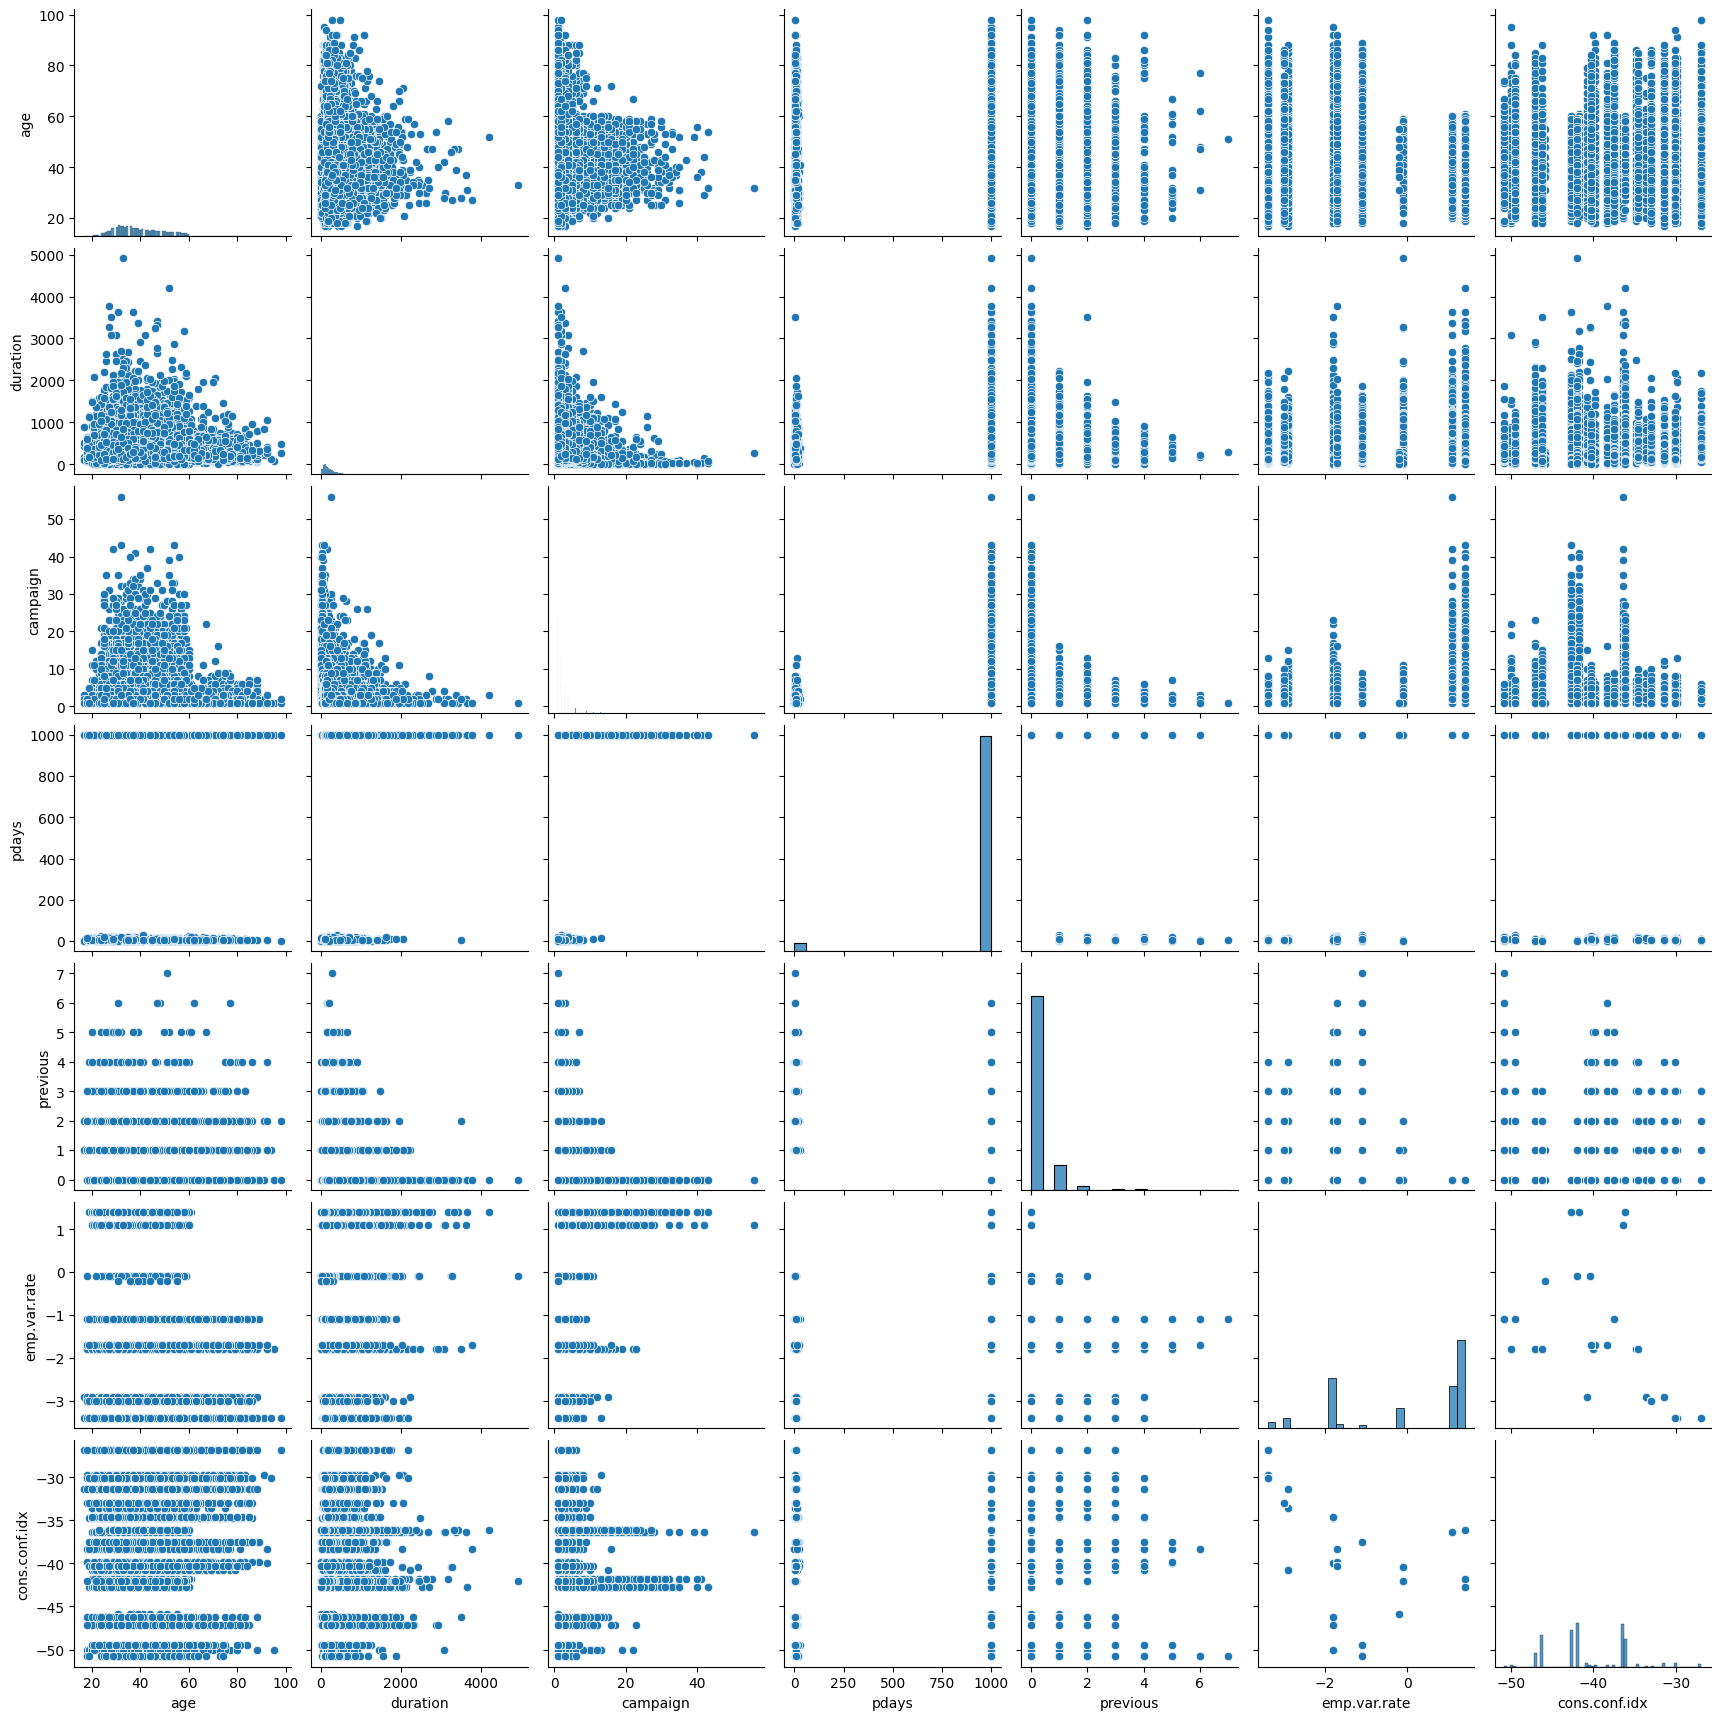

In [19]:
numeric_df = df.select_dtypes(exclude=['object'])
sns.pairplot(data=numeric_df)

<Axes: xlabel='campaign', ylabel='age'>

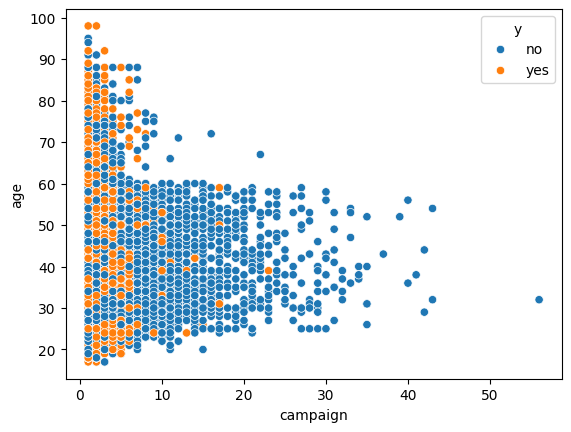

In [22]:
# most of the yes in the target variable is between 1-10
sns.scatterplot(x=df["campaign"], y=df["age"],hue=df['y'])

<Axes: xlabel='contact', ylabel='age'>

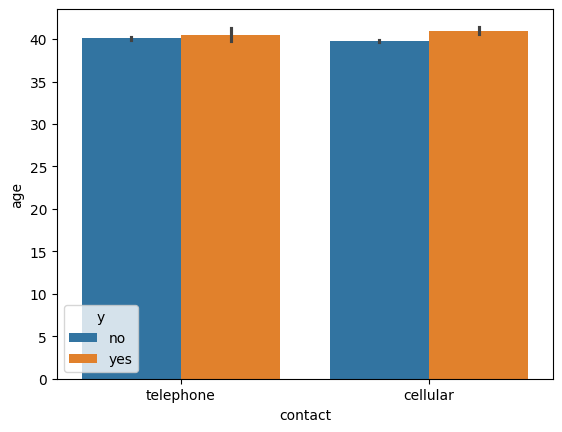

In [25]:
sns.barplot(x=df['contact'],y=df['age'],hue=df['y'])
# contact doesn't show an relation with y whether telephone or cellular they are the same so i'll drop it
# day_of_week wil be dropped as data is not time series

<Axes: xlabel='y', ylabel='emp.var.rate'>

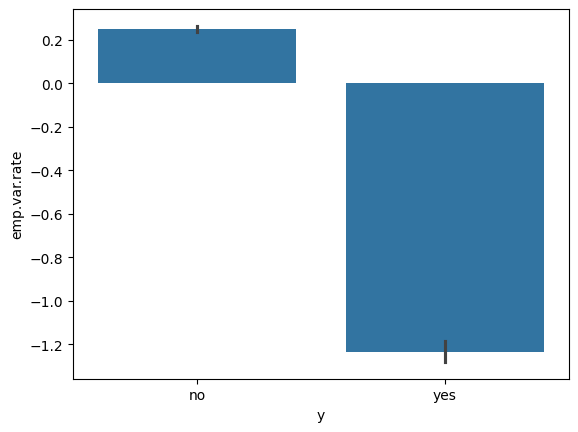

In [27]:
sns.barplot(x=df['y'],y=df['emp.var.rate'])

In [29]:
df.drop(['contact','day_of_week'],axis=1,inplace=True)


KeyError: "['contact', 'day_of_week'] not found in axis"

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            41188 non-null  int64  
 1   job            41188 non-null  object 
 2   marital        41188 non-null  object 
 3   education      41188 non-null  object 
 4   default        41188 non-null  object 
 5   housing        41188 non-null  object 
 6   loan           41188 non-null  object 
 7   month          41188 non-null  object 
 8   duration       41188 non-null  int64  
 9   campaign       41188 non-null  int64  
 10  pdays          41188 non-null  int64  
 11  previous       41188 non-null  int64  
 12  poutcome       41188 non-null  object 
 13  emp.var.rate   41188 non-null  float64
 14  cons.conf.idx  41188 non-null  float64
 15  y              41188 non-null  object 
dtypes: float64(2), int64(5), object(9)
memory usage: 5.0+ MB


In [ ]:
emp.var.rate

## Check for outliers
You can use box plots, histograms, and z-scores to find outliers. many outliers must be treated

<Axes: ylabel='age'>

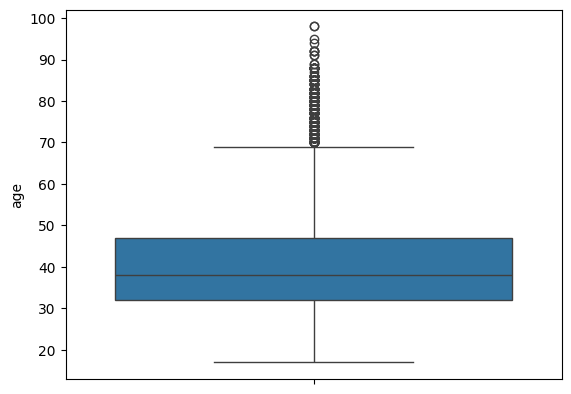

In [32]:
sns.boxplot(df['age'])

<Axes: ylabel='duration'>

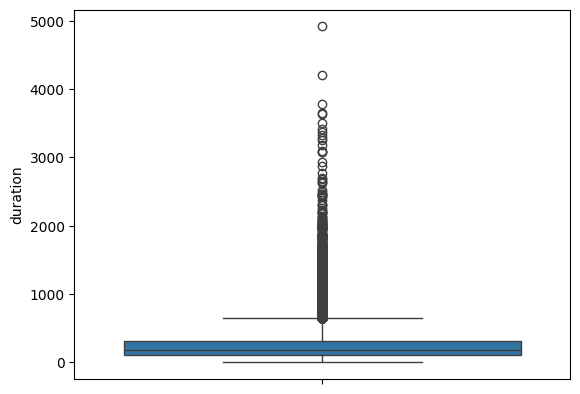

In [34]:
sns.boxplot(df['duration'])

<Axes: ylabel='campaign'>

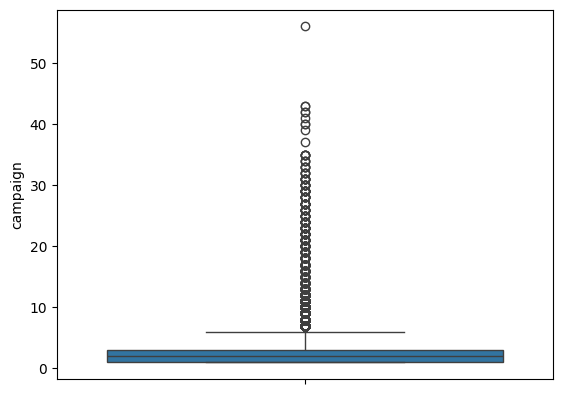

In [35]:
sns.boxplot(df['campaign'])

<Axes: ylabel='emp.var.rate'>

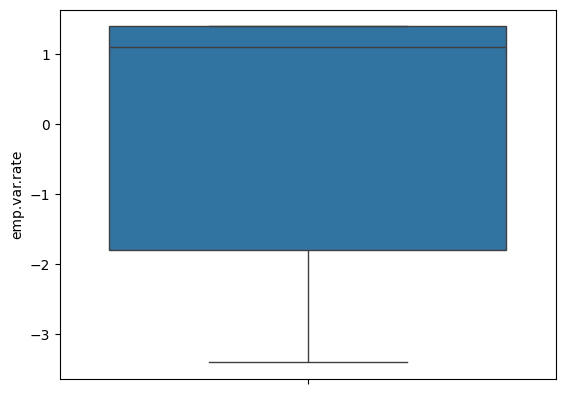

In [36]:
sns.boxplot(df['emp.var.rate'])

suggested models: logistic regression + encoding data + standardization + pca , trees, xgboost